# training

In [17]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img,img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [18]:
TRAIN_DIR = 'train'
TEST_DIR = 'validation'

In [19]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [20]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [21]:
print(train)

                                              image     label
0     train\angry\11647173796_033ff06112_n_face.png     angry
1      train\angry\1379351899_7cfa2b0dc4_b_face.png     angry
2     train\angry\14187801814_ea89208940_b_face.png     angry
3     train\angry\22600236939_54d0e01905_n_face.png     angry
4     train\angry\22721287949_65572bea8b_n_face.png     angry
...                                             ...       ...
5345                  train\surprise\Z (4)_face.png  surprise
5346                  train\surprise\Z (6)_face.png  surprise
5347                  train\surprise\Z (7)_face.png  surprise
5348                  train\surprise\Z (9)_face.png  surprise
5349                      train\surprise\Z_face.png  surprise

[5350 rows x 2 columns]


In [22]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [23]:
print(test)
print(test['image'])

                             image     label
0       validation\angry\10052.jpg     angry
1       validation\angry\10065.jpg     angry
2       validation\angry\10079.jpg     angry
3       validation\angry\10095.jpg     angry
4       validation\angry\10121.jpg     angry
...                            ...       ...
7061  validation\surprise\9806.jpg  surprise
7062  validation\surprise\9830.jpg  surprise
7063  validation\surprise\9853.jpg  surprise
7064  validation\surprise\9878.jpg  surprise
7065   validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         validation\angry\10052.jpg
1         validation\angry\10065.jpg
2         validation\angry\10079.jpg
3         validation\angry\10095.jpg
4         validation\angry\10121.jpg
                    ...             
7061    validation\surprise\9806.jpg
7062    validation\surprise\9830.jpg
7063    validation\surprise\9853.jpg
7064    validation\surprise\9878.jpg
7065     validation\surprise\993.jpg
Name: image, Length: 7066, d

In [24]:
from tqdm.notebook import tqdm
import cv2

In [25]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        img = cv2.resize(img, (48, 48))
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [26]:
train_features = extract_features(train['image']) 

  0%|          | 0/5350 [00:00<?, ?it/s]

C:\Users\M.STRANGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [27]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [28]:
x_train = train_features/255.0
x_test = test_features/255.0

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\M.STRANGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [35]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 20, validation_data = (x_test,y_test)) 

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 758ms/step - accuracy: 0.2231 - loss: 1.9091 - val_accuracy: 0.2583 - val_loss: 1.8941
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 747ms/step - accuracy: 0.2640 - loss: 1.8803 - val_accuracy: 0.2583 - val_loss: 1.8853
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 755ms/step - accuracy: 0.2658 - loss: 1.8681 - val_accuracy: 0.2583 - val_loss: 1.8838
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 759ms/step - accuracy: 0.2677 - loss: 1.8669 - val_accuracy: 0.2583 - val_loss: 1.8700
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 758ms/step - accuracy: 0.2607 - loss: 1.8257 - val_accuracy: 0.2567 - val_loss: 1.8010
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 783ms/step - accuracy: 0.3346 - loss: 1.7262 - val_accuracy: 0.3078 - val_loss: 1.7667
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 750ms/step - accuracy: 0.3728 - loss: 1.6301 - val_accuracy: 0.3388 - val_loss: 1.7414
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 755ms/step - accuracy: 0.3912 - loss: 1.5619 - val_accu

In [36]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

# image test

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [31]:
def ef(image):
    img = load_img(image,grayscale =  True )
    
    img = img_to_array(img)
    img = cv2.resize(img, (48, 48))
    
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [34]:
image = 'train/sad/2Q__ (1)_face.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  sad


In [28]:
import matplotlib.pyplot as plt
# %matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
model prediction is  sad


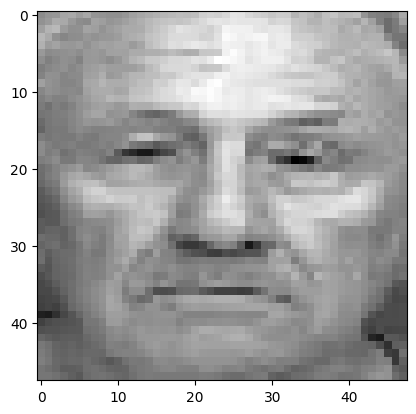

In [43]:
image = 'train/sad/images - 2020-11-06T005425.535_face.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  fear


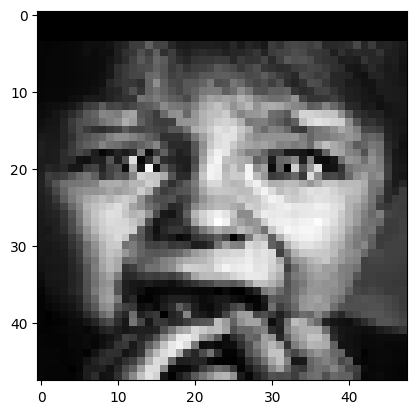

In [46]:
image = 'train/fear/9k_ (4)_face.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  angry


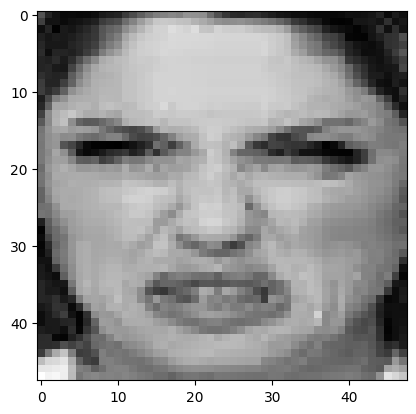

In [50]:
image = 'train/disgust/images - 2020-11-05T231250.765_face.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  happy


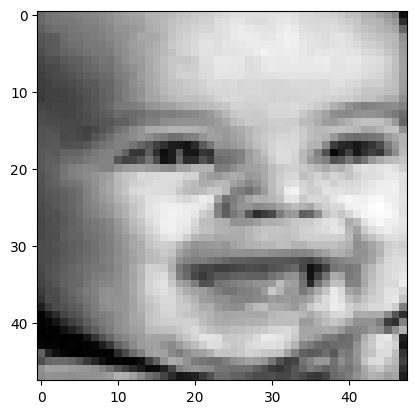

In [52]:
image = 'train/happy/6261718185_1e253a1f74_n_face.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  surprise


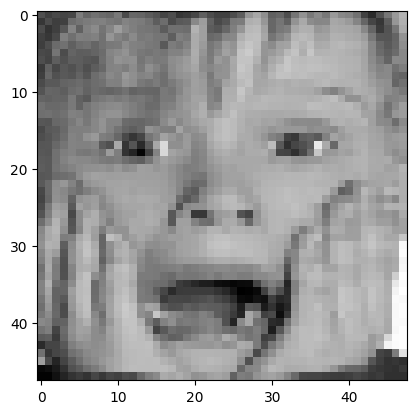

In [55]:
image = 'train/surprise/images - 2020-11-06T202524.557_face.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

# testing

In [37]:
import cv2
from keras.models import model_from_json
import numpy as np

In [38]:
# from keras_preprocessing.image import load_img

json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

In [39]:
model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

In [40]:
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return model.predict(feature/255.0)

In [41]:
webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}

In [42]:

while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            pred = extract_features(image)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━